Imports

In [2]:
%load_ext autoreload
%autoreload 2
%aimport -numpy
%aimport -torch
%aimport -gym

import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
torch.manual_seed(0)

# for saving/loading
import os

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Our functions

In [3]:
from Train_policy_func import Policy, Policy_v2, device
from Generate_traj_func import generate_trajectory
from Plot_Functions import plot_suboptimality, plot_trajectory_performance, plot_Scores
from PPO import ppo_update, RolloutBuffer, evaluate_policy

# Training loop for OPPO
from OPPO import baseline_CartPole_V0, baseline_MountainCar, OPPO_update
from OPPO import baseline_1, baseline_CartPole_v0_Fla
from PPO_Fla import *
from pairs_generator import sample_preference_pairs
from DPO import DPO_training



c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating policies and changing seeds:

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\youss\AppData\Local\Temp\ipykernel_15996\3812716162.py:42: FutureWarning: You are using `torch.

Evaluations over 100 episodes done for both policies


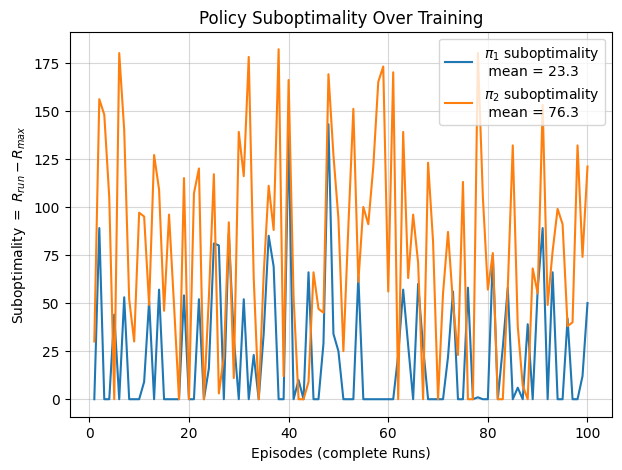

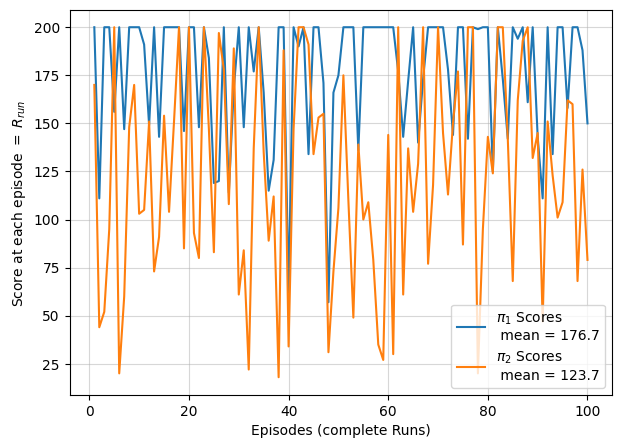

π₁ → length 176, total reward 176.0
π₂ → length 200, total reward 200.0
Collected 200 preference pairs.


C:\Users\youss\AppData\Local\Temp\ipykernel_15996\3812716162.py:97: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_DPO.load_state_dict(torch.load(f"pi2_oppo_{env_name}

Epoch 0: DPO Loss = 3.0699
Epoch 10: DPO Loss = 1.0362
Epoch 20: DPO Loss = 0.7020
Epoch 30: DPO Loss = 0.5667
Epoch 40: DPO Loss = 0.4798
Epoch 50: DPO Loss = 0.4288
Epoch 60: DPO Loss = 0.3962
Epoch 70: DPO Loss = 0.3792
Epoch 80: DPO Loss = 0.3661
Epoch 90: DPO Loss = 0.3533
Epoch 100: DPO Loss = 0.3422
Epoch 110: DPO Loss = 0.3320
Epoch 120: DPO Loss = 0.3216
Epoch 130: DPO Loss = 0.3125
Epoch 140: DPO Loss = 0.3039
Epoch 150: DPO Loss = 0.2962
Epoch 160: DPO Loss = 0.2884
Epoch 170: DPO Loss = 0.2808
Epoch 180: DPO Loss = 0.2736
Epoch 190: DPO Loss = 0.2668
Epoch 200: DPO Loss = 0.2609
Epoch 210: DPO Loss = 0.2556
Epoch 220: DPO Loss = 0.2505
Epoch 230: DPO Loss = 0.2456
Epoch 240: DPO Loss = 0.2408
Epoch 250: DPO Loss = 0.2363
Epoch 260: DPO Loss = 0.2320
Epoch 270: DPO Loss = 0.2282
Epoch 280: DPO Loss = 0.2247
Epoch 290: DPO Loss = 0.2214
Epoch 300: DPO Loss = 0.2178
Epoch 310: DPO Loss = 0.2142
Epoch 320: DPO Loss = 0.2109
Epoch 330: DPO Loss = 0.2078
Epoch 340: DPO Loss = 0.2

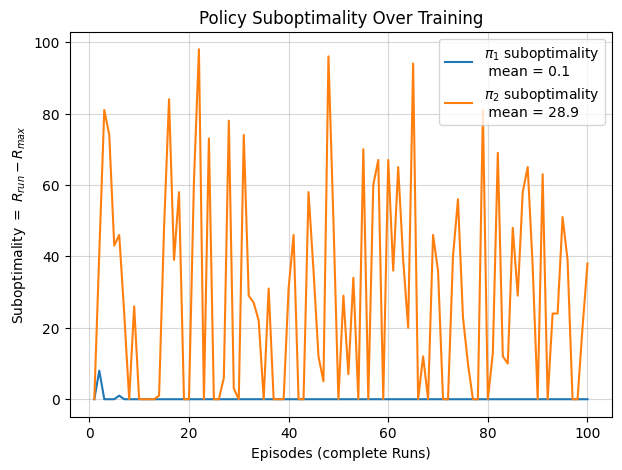

Evaluations over 100 episodes done for both policies


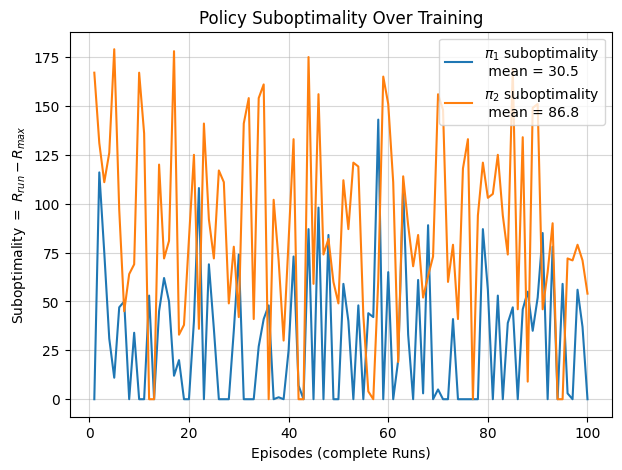

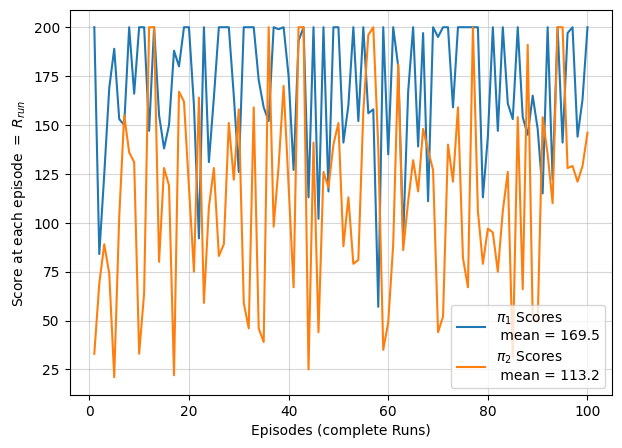

π₁ → length 200, total reward 200.0
π₂ → length 21, total reward 21.0
Collected 200 preference pairs.
Epoch 0: DPO Loss = 3.7307
Epoch 10: DPO Loss = 1.2437
Epoch 20: DPO Loss = 0.9666
Epoch 30: DPO Loss = 0.6512
Epoch 40: DPO Loss = 0.5288
Epoch 50: DPO Loss = 0.4846
Epoch 60: DPO Loss = 0.4476
Epoch 70: DPO Loss = 0.4240
Epoch 80: DPO Loss = 0.4059
Epoch 90: DPO Loss = 0.3899
Epoch 100: DPO Loss = 0.3760
Epoch 110: DPO Loss = 0.3655
Epoch 120: DPO Loss = 0.3579
Epoch 130: DPO Loss = 0.3516
Epoch 140: DPO Loss = 0.3458
Epoch 150: DPO Loss = 0.3409
Epoch 160: DPO Loss = 0.3368
Epoch 170: DPO Loss = 0.3331
Epoch 180: DPO Loss = 0.3298
Epoch 190: DPO Loss = 0.3266
Epoch 200: DPO Loss = 0.3232
Epoch 210: DPO Loss = 0.3198
Epoch 220: DPO Loss = 0.3163
Epoch 230: DPO Loss = 0.3131
Epoch 240: DPO Loss = 0.3101
Epoch 250: DPO Loss = 0.3070
Epoch 260: DPO Loss = 0.3038
Epoch 270: DPO Loss = 0.3003
Epoch 280: DPO Loss = 0.2967
Epoch 290: DPO Loss = 0.2924
Epoch 300: DPO Loss = 0.2871
Epoch 310:

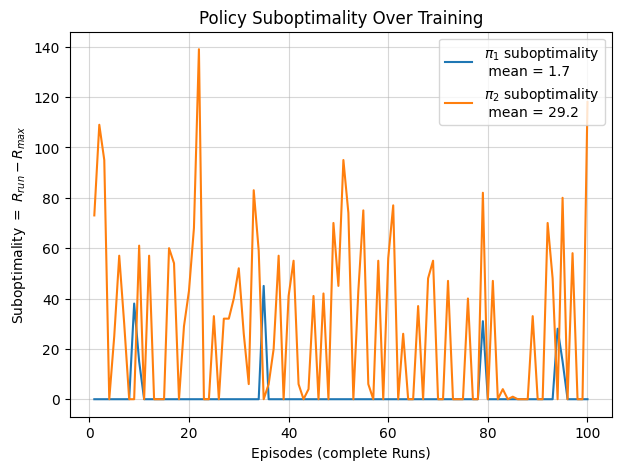

Evaluations over 100 episodes done for both policies


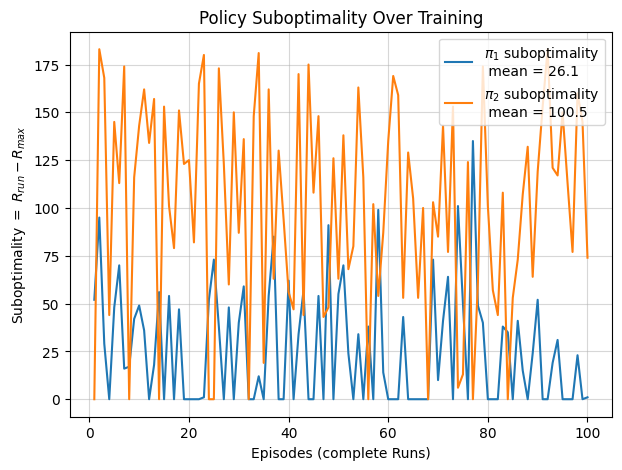

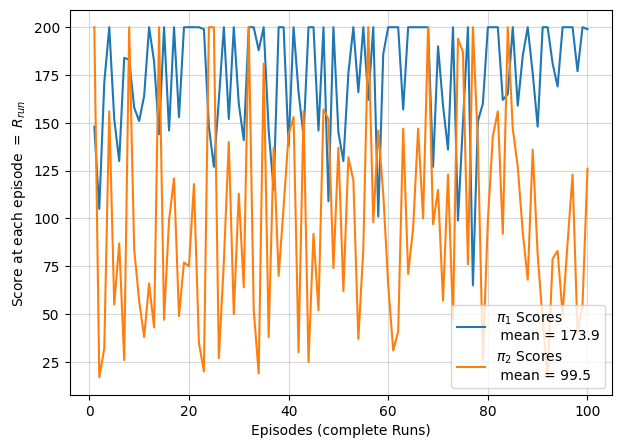

π₁ → length 158, total reward 158.0
π₂ → length 29, total reward 29.0
Collected 200 preference pairs.
Epoch 0: DPO Loss = 2.8329
Epoch 10: DPO Loss = 1.0377
Epoch 20: DPO Loss = 0.5608
Epoch 30: DPO Loss = 0.3628
Epoch 40: DPO Loss = 0.3102
Epoch 50: DPO Loss = 0.2789
Epoch 60: DPO Loss = 0.2607
Epoch 70: DPO Loss = 0.2509
Epoch 80: DPO Loss = 0.2436
Epoch 90: DPO Loss = 0.2376
Epoch 100: DPO Loss = 0.2326
Epoch 110: DPO Loss = 0.2286
Epoch 120: DPO Loss = 0.2250
Epoch 130: DPO Loss = 0.2219
Epoch 140: DPO Loss = 0.2188
Epoch 150: DPO Loss = 0.2161
Epoch 160: DPO Loss = 0.2133
Epoch 170: DPO Loss = 0.2103
Epoch 180: DPO Loss = 0.2076
Epoch 190: DPO Loss = 0.2052
Epoch 200: DPO Loss = 0.2029
Epoch 210: DPO Loss = 0.2008
Epoch 220: DPO Loss = 0.1990
Epoch 230: DPO Loss = 0.1972
Epoch 240: DPO Loss = 0.1956
Epoch 250: DPO Loss = 0.1939
Epoch 260: DPO Loss = 0.1921
Epoch 270: DPO Loss = 0.1899
Epoch 280: DPO Loss = 0.1877
Epoch 290: DPO Loss = 0.1855
Epoch 300: DPO Loss = 0.1834
Epoch 310:

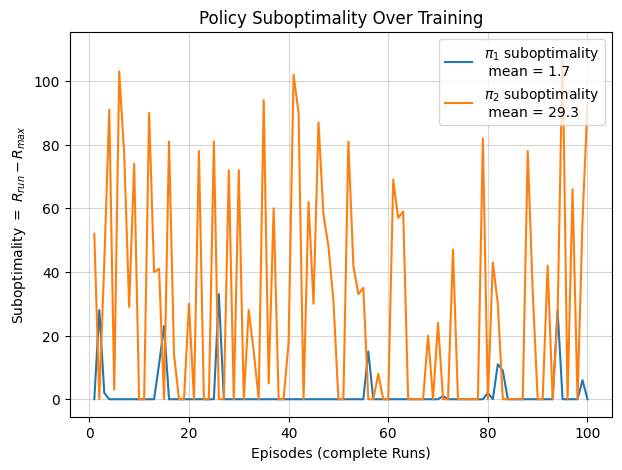

In [5]:
seeds_list=[42,100,35]
for seed in seeds_list:
    # Choose environment:

    # env 1: CartPole-v0
    env_name='CartPole-v0'
    baseline = baseline_CartPole_v0_Fla
    target_score = 185 # for CartPole-v0
    torch.manual_seed(seed)
    # env 2: Continuous-MountainCar-v0
    # env_name='MountainCar-v0'
    # baseline = baseline_MountainCar
    # target_score = -110 # for Continuous-MountainCar-v0

    lr_oppo = 0.003 # learning rate for OPPO

    load_policies = True

    # ── Hyperparams for OPPO ──
    n_episodes              = 1200 # keep same “number of iterations” for fair comparison
    max_t                   = 200  # cap on steps per episode
    print_every             = 20   # print every x episodes and avg also the score for every x episodes
    gamma                   = 0.99

    seed_training_policies  = seed


    # ── Instantiate the two policies & optimizers for OPPO ──
    env_oppo   = gym.make(env_name)

    pi1_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt1_oppo    = torch.optim.Adam(pi1_oppo.parameters(), lr=lr_oppo)

    pi2_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt2_oppo   = torch.optim.Adam(pi2_oppo.parameters(), lr=lr_oppo)


    # ── Load the policies if you want to reuse them ──
    if load_policies:
        pi1_oppo.load_state_dict(torch.load(f"pi1_oppo_{env_name}.pth"))


    # ── Run the OPPO training ──
    if not load_policies:
    # Training the policy:
        scores_oppo = OPPO_update(
            policy       = pi1_oppo,
            optimizer    = opt1_oppo,
            env          = env_oppo,
            baseline     = baseline,
            n_episodes   = n_episodes,
            max_t        = max_t,
            gamma        = gamma,      # you can reuse your PPO γ
            print_every  = print_every,
            early_stop   = False,
            seed = seed_training_policies,
            target_score = target_score,
            env_name= env_name,
            display_every = False
        )

    pi2_oppo.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))


    # seed_evaluation = 26
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(pi1_oppo, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(pi2_oppo, env_oppo, n_episodes=num_episodes)
    print("Evaluations over", num_episodes, "episodes done for both policies")

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        max_reward=200, # for CartPole-v0
    )

    plot_Scores(
        pi1_reward,
        pi2_reward,
    )
    traj1 = generate_trajectory(pi1_oppo, env_oppo, max_steps=1000)
    traj2 = generate_trajectory(pi2_oppo, env_oppo, max_steps=1000)

    print(f"π₁ → length {len(traj1)}, total reward {sum(s['reward'] for s in traj1):.1f}")
    print(f"π₂ → length {len(traj2)}, total reward {sum(s['reward'] for s in traj2):.1f}")
    K=200
    prefs = sample_preference_pairs(pi1_oppo, pi2_oppo, env_oppo, K=K) # Need to define K elsewhere as hyperparameter
    print(f"Collected {len(prefs)} preference pairs.")
    lr_DPO=0.01

    policy_DPO=Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    policy_ref=pi1_oppo
    opt_DPO    = torch.optim.Adam(policy_DPO.parameters(), lr=lr_DPO)
    policy_DPO.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))
    beta=0.5

    DPO_training(policy_DPO,policy_ref,prefs,beta,opt_DPO,nb_epochs=400)
    torch.save(policy_DPO.state_dict(), f"pi_DPO_{env_name}_seed_{seed}_K{K}.pth")
    print(f"Saved final policy as pi_DPO_{env_name}_seed_{seed}_K{K}.pth")
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(policy_DPO, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(policy_ref, env_oppo, n_episodes=num_episodes)

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        200,
    )  # in cartpole, 200 is the maximum reward

